In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
885,3,female,39.0,29.1250,0
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
889,1,male,26.0,30.0000,1


In [11]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
...,...,...,...,...,...
885,3,1,39.0,29.1250,0
886,2,0,27.0,13.0000,0
887,1,1,19.0,30.0000,1
889,1,0,26.0,30.0000,1


In [13]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']].values
y = df['Survived'].values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
np.random.seed(0)
input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
lr = 0.01

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [17]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)


In [19]:
def compute_loss(y_true, y_pred):
    eps = 1e-10
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

losses = []

In [21]:
for epoch in range(50):
   
    z1 = np.dot(X_train, W1) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    
    loss = compute_loss(y_train, a2)
    losses.append(loss)
    
    dz2 = a2 - y_train
    dW2 = np.dot(a1.T, dz2) / len(X_train)
    db2 = np.sum(dz2, axis=0, keepdims=True) / len(X_train)
    
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)
    dW1 = np.dot(X_train.T, dz1) / len(X_train)
    db1 = np.sum(dz1, axis=0, keepdims=True) / len(X_train)
    
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

Epoch 10, Loss: 0.8753
Epoch 20, Loss: 0.8400
Epoch 30, Loss: 0.8095
Epoch 40, Loss: 0.7826
Epoch 50, Loss: 0.7584


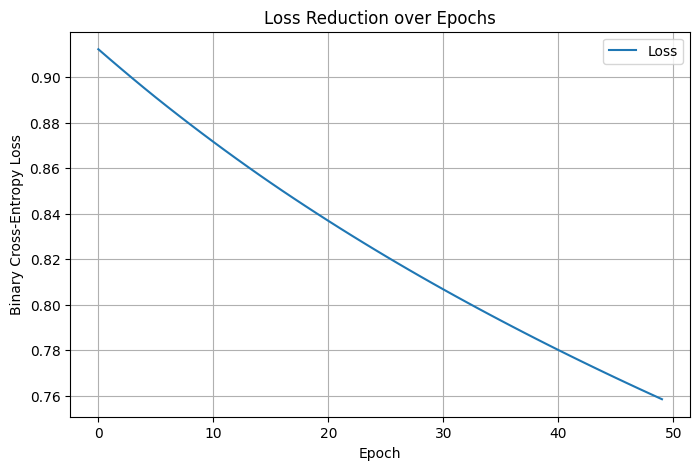

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.title("Loss Reduction over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.legend()
plt.show()